In [1]:
import xrdos
import pandas as pd
import numpy as np
import sklearn

Using TensorFlow backend.


Will be testing our functions on 'HCEPD_100K.csv' and 'HCEPDB_moldata.csv' as an example, make sure you have this file in your directory if attempting to run these functions.

Loading the data into a dataframe

In [2]:
data = pd.read_csv('HCEPD_100K.csv')
data.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1


Dropping columns that won't be used in our model

In [3]:
dropped_columns = ['id', 'SMILES_str', 'stoich_str',
                   'tmp_smiles_str']
data.drop(labels = dropped_columns, axis = 1, inplace = True)
data.head()

,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
0,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656
1,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074
2,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368
3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025
4,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680


Moving the 'pce' column to the **last column**, this is a requirement for training a ML model with our package.

In [4]:
data = data[['mass', 'voc', 'jsc', 'e_homo_alpha', 'e_gap_alpha', 'e_lumo_alpha', 'pce']]
data.head()

,mass,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,pce
0,394.3151,0.867601,91.567575,-5.467601,2.022944,-3.444656,5.161953
1,400.4135,0.504824,160.401549,-5.104824,1.630750,-3.474074,5.261398
2,363.4903,0.000000,197.474780,-4.539526,1.462158,-3.077368,0.000000
3,319.4448,0.630274,149.887545,-5.230274,1.682250,-3.548025,6.138294
4,379.3398,0.242119,126.581347,-4.842119,1.809439,-3.032680,1.991366


Below I am modifying the test train split function we used in xrdos.py so it can be used for another dataset. Our function's use case was only specified for the Materials Project Database.

In [5]:
def train_test_split(df):
    """This function splits the input dataframe into train,
    validation and test groups. For our purposes, we used
    a 70% train, 15% validation and 15% test.
    df: dataframe containing all data to be 
    used for model.
    returns df_train, df_val, df_test"""
    train, test_and_val = sklearn.model_selection.train_test_split(df, test_size=.30)
    test, val = sklearn.model_selection.train_test_split(test_and_val, test_size=.5)
    df_train = pd.DataFrame(train)
    df_val = pd.DataFrame(val)
    df_test = pd.DataFrame(test)
    return df_train, df_val, df_test

Splitting the data into train, validation, test groups for this demo. Also, checking the length of each to ensure it was done correctly.

In [6]:
df_train, df_val, df_test = train_test_split(data)
print('len(df_train) = ' + str(len(df_train)) + ',', 'len(df_val) = ' + str(len(df_val)) + ',', 'len(df_test) = ' + str(len(df_test)))

len(df_train) = 69999, len(df_val) = 15000, len(df_test) = 15000


Creating a linear regression object

In [24]:
regr = xrdos.linear_regression()

Training a linear regression model adding polynomial terms up to degree 2.

In [33]:
model, validation_error, scaler = xrdos.train_model(df_train, df_val, regr, 1, [True, 2, True])

Below is the error on the validation set after training.

In [34]:
validation_error

0.00862220016294997

Outputting training error

In [35]:
train_predictions, train_test_error = xrdos.model_prediction(df_train, model, scaler, 1, [True, 2, True])
train_test_error

5.808348123484931e-15

Testing model, and outputting test error (RMSE)

In [36]:
test_predictions, test_error = xrdos.model_prediction(df_test, model, scaler, 1, [True, 2, True])
test_error

5.7094797368762756e-15

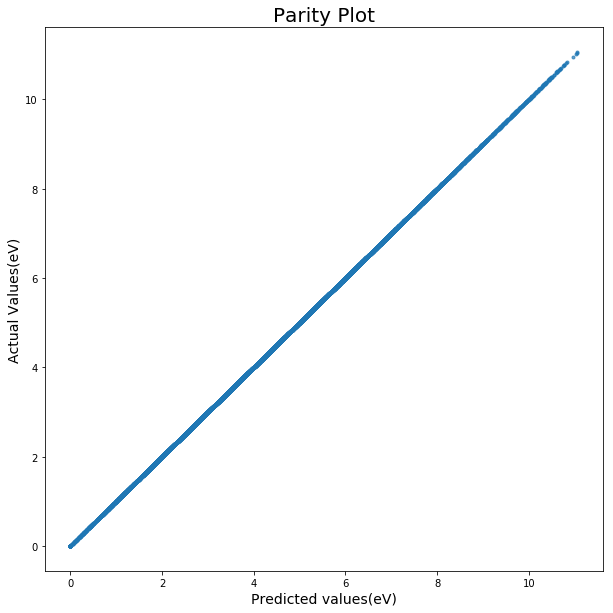

In [37]:
xrdos.single_plot(test_predictions, df_test[['pce']], (10, 10),
                  ('Parity Plot', 20), ('Predicted values(eV)', 14), ('Actual Values(eV)', 14),
                  (None, None), (None, None))


As you can see from above, the model appears to show perfect predictability, I am skeptical of the results but good practices were used in obtaining this model and this example validates our functions.

In [38]:
whole_database = pd.read_csv('HCEPDB_moldata.csv')
whole_database.drop(labels = dropped_columns, axis = 1, inplace = True)
whole_database = whole_database[['mass', 'voc', 'jsc', 'e_homo_alpha', 'e_gap_alpha', 'e_lumo_alpha', 'pce']]

In [41]:
len(whole_database)

2322849

In [39]:
database_predictions, database_test_error = xrdos.model_prediction(whole_database, model, scaler, 1, [True, 2, True])
database_test_error

7.232408916681432e-15

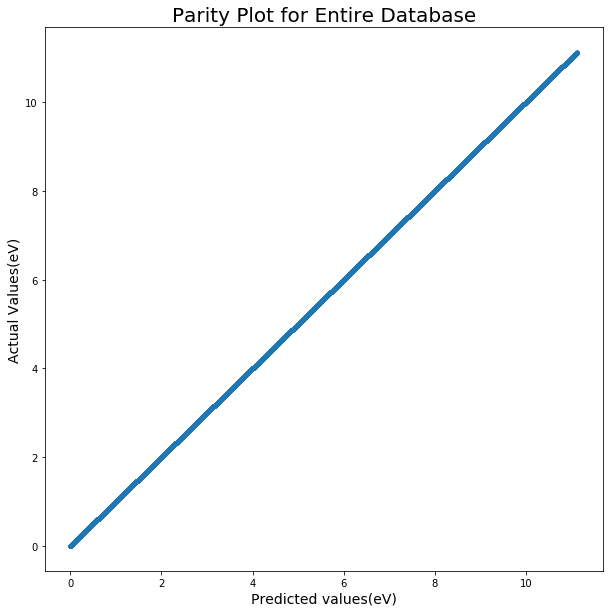

In [40]:
xrdos.single_plot(database_predictions, whole_database[['pce']], (10, 10),
                  ('Parity Plot for Entire Database', 20), ('Predicted values(eV)', 14), ('Actual Values(eV)', 14),
                  (None, None), (None, None))

The model appears to have very good validity, it predicts almost perfectly for the entire database. If it is overfit, it is overfit for the entire database, not just our training set.